In [13]:
import pandas as pd
import json

import matplotlib.pyplot as plt

In [41]:
with open('sit-ups03.json', 'r') as json_file:
    data = json.load(json_file)

In [42]:
data = pd.json_normalize(data)

In [43]:
data.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[0.13998012, 4.959424, 9.529716]",0,0,LSM6DSO Accelerometer,1,3114357777961892
1,3,"[-0.2661767, -0.6666634, -0.59076566]",0,0,LSM6DSO Gyroscope,4,3114357785170433
2,3,"[-0.009571291, 4.7727838, 9.969097]",0,0,LSM6DSO Accelerometer,1,3114357758545121
3,3,"[-0.09332009, 4.694718, 10.000204]",0,0,LSM6DSO Accelerometer,1,3114357739128454
4,3,"[-0.28236416, -0.66849595, -0.5803813]",0,0,LSM6DSO Gyroscope,4,3114357804587308


sensorId
LSM6DSO Accelerometer                 666
LSM6DSO Gyroscope                     663
LSM6DSO Gyroscope-Uncalibrated         63
LSM6DSO Accelerometer-Uncalibrated     63
linear_acceleration                    62
Name: count, dtype: int64


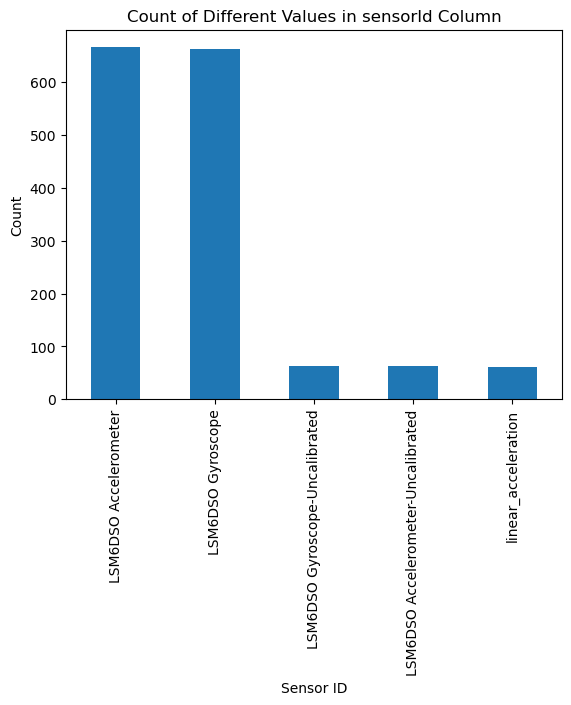

In [44]:
sensor_counts = data['sensorId'].value_counts()

# Print the sensor counts (optional)
print(sensor_counts)

# Plot the sensor counts
sensor_counts.plot(kind='bar')

# Set plot labels and title
plt.xlabel('Sensor ID')
plt.ylabel('Count')
plt.title('Count of Different Values in sensorId Column')

# Show the plot
plt.show()



In [45]:
# Filter the DataFrame for 'icm4x6xx Accelerometer Non-wakeup' in the 'sensorType' column
df = data[data['sensorId'] == 'LSM6DSO Accelerometer']

df.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[0.13998012, 4.959424, 9.529716]",0,0,LSM6DSO Accelerometer,1,3114357777961892
2,3,"[-0.009571291, 4.7727838, 9.969097]",0,0,LSM6DSO Accelerometer,1,3114357758545121
3,3,"[-0.09332009, 4.694718, 10.000204]",0,0,LSM6DSO Accelerometer,1,3114357739128454
5,3,"[0.16031912, 4.8708897, 8.889337]",0,0,LSM6DSO Accelerometer,1,3114357797378871
8,3,"[0.18185452, 4.453043, 8.773284]",0,0,LSM6DSO Accelerometer,1,3114357855629340


C:\Users\aiskr\AppData\Local\Temp\ipykernel_8980\3813903238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])
C:\Users\aiskr\AppData\Local\Temp\ipykernel_8980\3813903238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['x', 'y', 'z']] = pd.DataFrame(df['data'].tolist(), index=df.index)


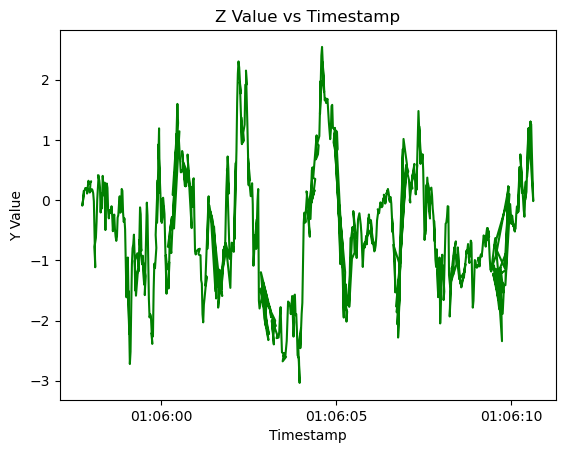

In [48]:
# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract 'x', 'y', 'z' values from the 'data' column
df[['x', 'y', 'z']] = pd.DataFrame(df['data'].tolist(), index=df.index)

# Create df_sensor with the desired columns
df_sensor = df[['timestamp', 'x', 'y', 'z']]

plt.plot(df_sensor['timestamp'], df_sensor['x'], linestyle='-', color='g')
# Set plot labels and title
plt.xlabel('Timestamp')
plt.ylabel('Y Value')
plt.title('Z Value vs Timestamp')

# Show the plot
plt.show()